In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

In [2]:
from sklearn.datasets import load_iris
datos = load_iris()
print(datos.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
datos.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
datos.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris = pd.DataFrame(datos.data, columns=datos.feature_names)

iris["objetivo"] = datos.target

In [12]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),objetivo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
variables_indep = iris.drop("objetivo", axis=1).columns

iris_X = iris[variables_indep]
iris_y = iris["objetivo"]

In [14]:
from sklearn.model_selection import train_test_split

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2)

In [15]:
from sklearn.svm import SVC, SVR

In [16]:
estimador_svm = SVC()

In [17]:
estimador_svm.fit(iris_X_train, iris_y_train)

SVC()

In [18]:
estimador_svm.predict(iris_X_test)[:10]

array([0, 0, 0, 2, 2, 0, 0, 0, 1, 0])

- **C** es el parámetro de Coste (que regula el impacto de las variables de holgura y ayuda a regularizar el modelo.
- **kernel** indica que kernel usar (rbf, radial basis function por defecto). Se puede usar cualquier kernel definido por nosotros, por defecto SVC conoce `rbf`, `poly` (polinomial), `linear` (lineal) o `sigmoid` (sigmoide).
- **class_weight**, nos permite pasar un diccionario de la forma `{clase:peso}` que permite asignar más peso a una clase que a otra. Para problemas con clases no balanceadas, podemos usar el parámetro 'balanced' para que se ajusten los pesos en función del número de casos de cada clase. 
- **decision_function_shape** si usar una estrategia de uno contra uno (ovo) o uno contra todos (one versus rest, ovr) en casos de clasificación multiclase.
- **cache_size** es el tamaño (en megabytes) del caché del modelo (cuantos datos puede guardar en memoria y reutilizarlos sin tener que calcularlos). SVMs son computacionalmente complejos asi que si hay mas memoria disponible mejor incrementarl este valor(por ejemplo, a 1000mb o 2000mb)

In [19]:
estimador_svm.support_vectors_

array([[5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3. , 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.3, 2.5, 4.9, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [5.6, 3. , 4.5, 1.5],
       [5.6, 2.9, 3.6, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.7, 2.6, 3.5, 1. ],
       [5.9, 3.2, 4.8, 1.8],
       [5. , 2.3, 3.3, 1. ],
       [6. , 2.9, 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [6.1, 2.8, 4.7, 1.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.2, 4.5, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [6.7, 3. , 5. , 1.7],
       [6.7, 2.5, 5.8, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2

In [20]:
estimador_svm.n_support_

array([ 5, 26, 21], dtype=int32)

In [25]:
X = datos.data[:,:2]
y = datos.target

In [ ]:
pip install mlxtend

In [23]:
from mlxtend.plotting import plot_decision_regions

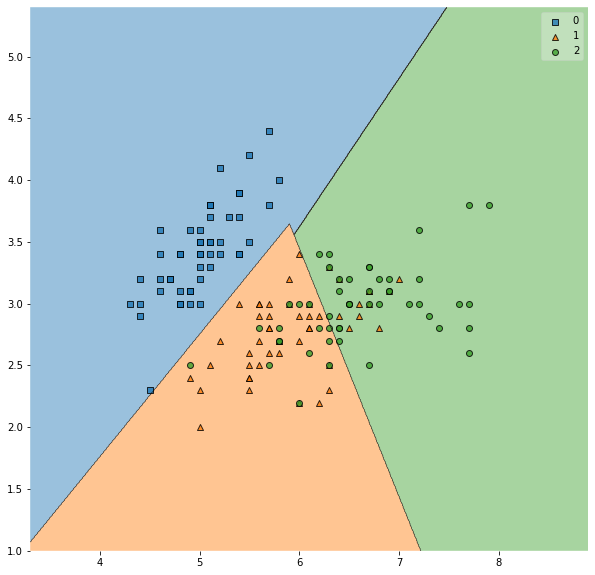

In [27]:
estimador_svm_lineal = SVC(kernel='linear')
estimador_svm_lineal.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_lineal);

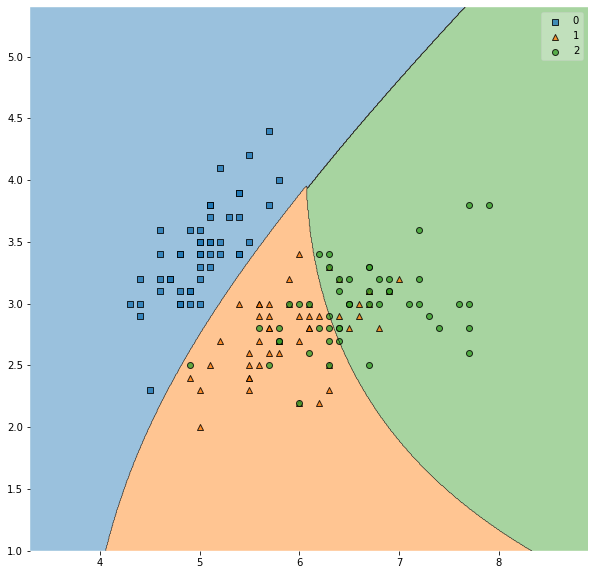

In [28]:
estimador_svm_polinomial = SVC(kernel="poly")
estimador_svm_polinomial.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_polinomial);

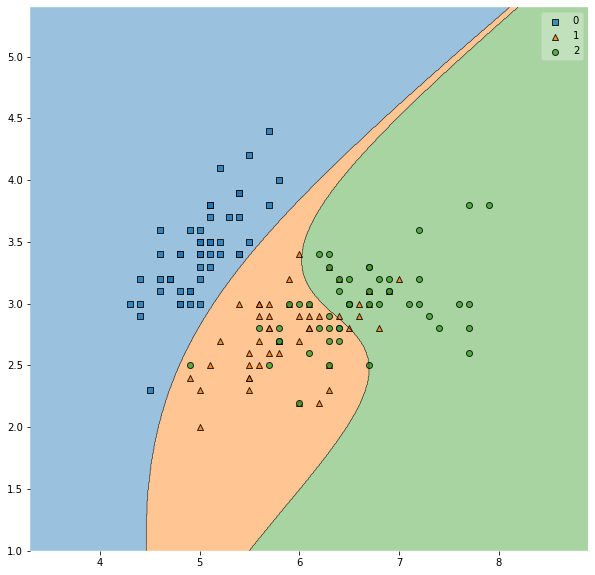

In [31]:
estimador_svm_polinomial = SVC(kernel="poly", degree=6).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

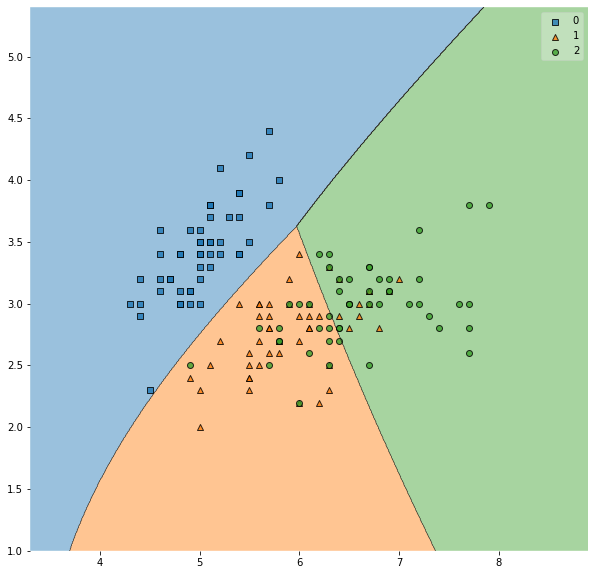

In [32]:
estimador_svm_polinomial = SVC(kernel="poly", degree=3, gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

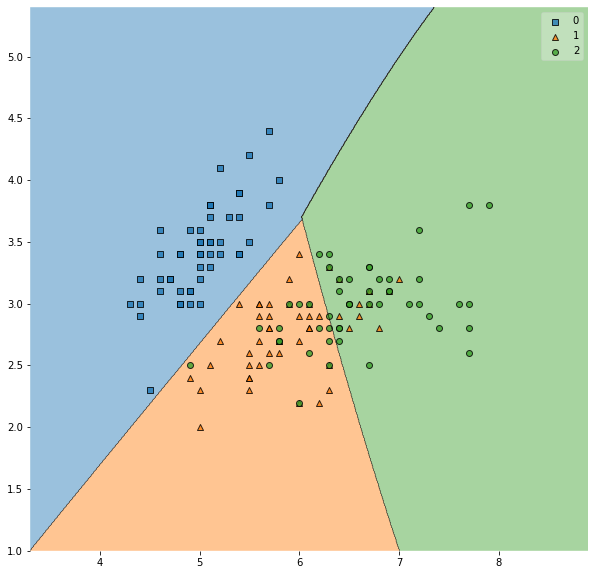

In [34]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=0.1)
estimador_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_rbf);

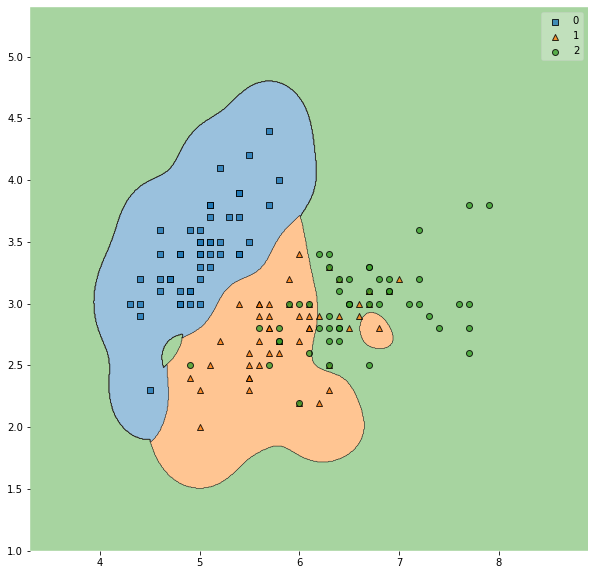

In [35]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=10)
estimador_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_rbf);

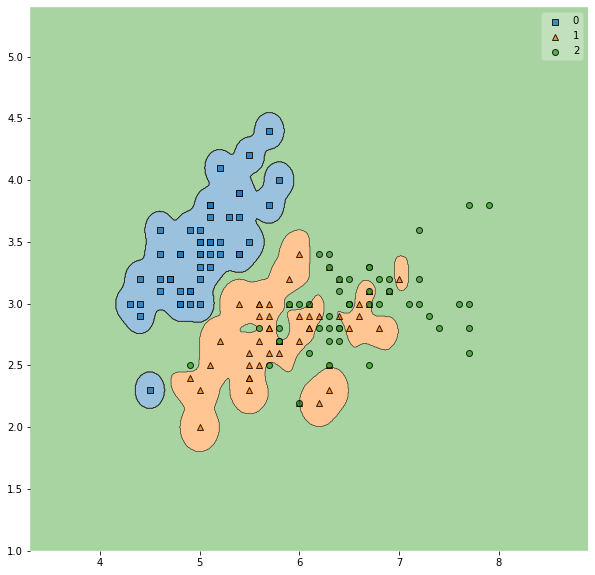

In [36]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=100)
estimador_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_rbf);